# Adversarial Search: Playing Connect 4

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Implement adversarial search algorithms for strategic game play.
* Analyze and optimize search in complex game spaces.
* Design effective heuristic evaluation functions.
* Compare performance across different agent strategies.
* Evaluate algorithmic trade-offs between decision quality and efficiency.

## Instructions

Total Points: Undergraduates 100, graduate students 110

Complete this notebook and submit it. The notebook needs to be a complete project report with your implementation, documentation including a short discussion of how your implementation works and your design choices, and experimental results (e.g., tables and charts with simulation results) with a short discussion of what they mean. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## Introduction

You will implement different versions of agents that play Connect 4:

> "Connect 4 is a two-player connection board game, in which the players choose a color and then take turns dropping colored discs into a seven-column, six-row vertically suspended grid. The pieces fall straight down, occupying the lowest available space within the column. The objective of the game is to be the first to form a horizontal, vertical, or diagonal line of four of one's own discs." (see [Connect Four on Wikipedia](https://en.wikipedia.org/wiki/Connect_Four))

Note that [Connect-4 has been solved](https://en.wikipedia.org/wiki/Connect_Four#Mathematical_solution)
in 1988. A connect-4 solver with a discussion of how to solve different parts of the problem can be found here: https://connect4.gamesolver.org/en/

## Task 1: Defining the Search Problem [10 point]

Define the components of the search problem:

* Initial state
* Actions
* Transition model (result function)
* Goal state (terminal state and utility)

Describe each component and then implement it as a function that can be used by search algorithms.

Trạng thái ban đầu:


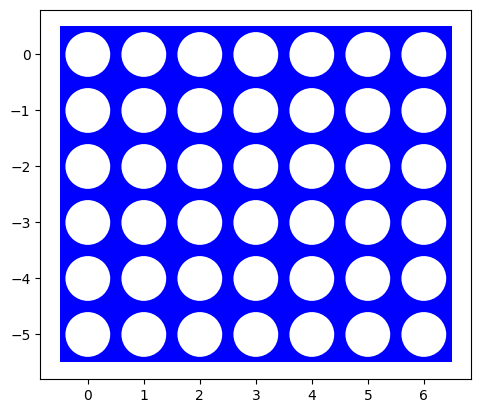

Các hành động hợp lệ: [0, 1, 2, 3, 4, 5, 6]

Trạng thái sau khi người chơi 1 thả quân vào cột 3:


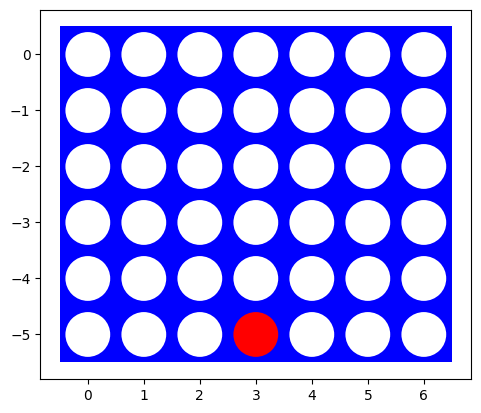

Các hành động hợp lệ: [0, 1, 2, 3, 4, 5, 6]

Trạng thái thắng cho người chơi 1:


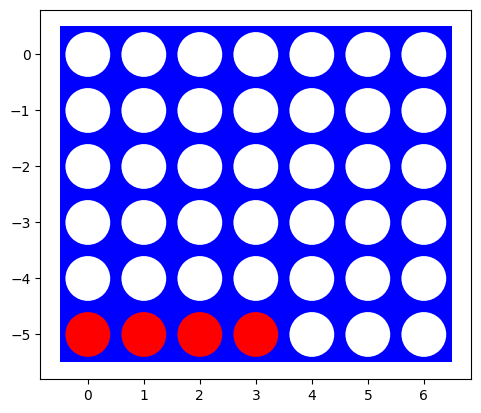

Trạng thái kết thúc: True
Tiện ích cho người chơi 1: 1
Tiện ích cho người chơi -1: -1

Trạng thái hòa:


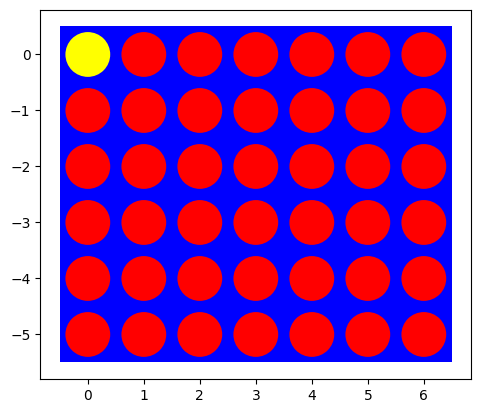

Trạng thái kết thúc: True
Tiện ích cho người chơi 1: 1
Tiện ích cho người chơi -1: -1


In [5]:
# Triển khai các hàm cho các thành phần của bài toán tìm kiếm

import numpy as np
import matplotlib.pyplot as plt

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()


def actions(board):
    """
    Trả về danh sách các cột hợp lệ để thả quân cờ.
    Một cột hợp lệ nếu hàng trên cùng (hàng 0) của cột đó trống (giá trị là 0).
    """
    return [col for col in range(board.shape[1]) if board[0, col] == 0]

def result(board, player, action):
    """
    Trả về trạng thái bảng mới sau khi người chơi thực hiện hành động.
    """
    new_board = board.copy()
    # Tìm hàng thấp nhất trong cột đã chọn
    row = -1
    for r in range(board.shape[0] - 1, -1, -1):
        if new_board[r, action] == 0:
            row = r
            break
    if row != -1:
        new_board[row, action] = player
    return new_board

def terminal(board):
    """
    Kiểm tra xem trạng thái hiện tại có phải là trạng thái kết thúc hay không.
    """
    # Kiểm tra thắng theo chiều ngang, dọc và đường chéo
    if check_win(board, 1) or check_win(board, -1):
        return True
    # Kiểm tra hòa (bảng đầy)
    if 0 not in board[0, :]:
        return True
    return False

def check_win(board, player):
    """
    Kiểm tra xem người chơi có thắng trong trạng thái hiện tại hay không.
    Kiểm tra 4 quân cờ liên tiếp theo chiều ngang, dọc và đường chéo.
    """
    rows, cols = board.shape
    # Kiểm tra ngang
    for r in range(rows):
        for c in range(cols - 3):
            if np.all(board[r, c:c+4] == player):
                return True
    # Kiểm tra dọc
    for r in range(rows - 3):
        for c in range(cols):
            if np.all(board[r:r+4, c] == player):
                return True
    # Kiểm tra đường chéo (từ trái trên xuống phải dưới)
    for r in range(rows - 3):
        for c in range(cols - 3):
            if np.all([board[r+i, c+i] == player for i in range(4)]):
                return True
    # Kiểm tra đường chéo (từ trái dưới lên phải trên)
    for r in range(3, rows):
        for c in range(cols - 3):
            if np.all([board[r-i, c+i] == player for i in range(4)]):
                return True
    return False


def utility(board, player):
    """
    Trả về giá trị tiện ích cho người chơi trong trạng thái kết thúc.
    """
    if check_win(board, player):
        return 1
    elif check_win(board, -player):
        return -1
    else:
        return 0 # Hòa

# Kiểm tra các hàm
board = empty_board()
print("Trạng thái ban đầu:")
visualize(board)
print("Các hành động hợp lệ:", actions(board))

next_board = result(board, 1, 3) # Người chơi 1 thả quân vào cột 3
print("\nTrạng thái sau khi người chơi 1 thả quân vào cột 3:")
visualize(next_board)
print("Các hành động hợp lệ:", actions(next_board))

# Tạo một trạng thái thắng cho người chơi 1
win_board = empty_board()
win_board[5, 0:4] = 1
print("\nTrạng thái thắng cho người chơi 1:")
visualize(win_board)
print("Trạng thái kết thúc:", terminal(win_board))
print("Tiện ích cho người chơi 1:", utility(win_board, 1))
print("Tiện ích cho người chơi -1:", utility(win_board, -1))

# Tạo một trạng thái hòa (bảng đầy)
draw_board = np.full((6, 7), 1)
draw_board[0, 0] = -1 # Đảm bảo không có người thắng
print("\nTrạng thái hòa:")
visualize(draw_board)
print("Trạng thái kết thúc:", terminal(draw_board))
print("Tiện ích cho người chơi 1:", utility(draw_board, 1))
print("Tiện ích cho người chơi -1:", utility(draw_board, -1))

How big is the state space? Give an estimate and explain it.

### Kích thước không gian trạng thái

Không gian trạng thái của Connect 4 là số lượng tất cả các cấu hình bảng có thể có. Đối với bảng 6x7, tổng số vị trí là $6 \times 7 = 42$. Mỗi vị trí có thể trống, chứa quân cờ của người chơi 1 hoặc chứa quân cờ của người chơi -1. Tuy nhiên, không phải tất cả các cấu hình đều hợp lệ (ví dụ: một quân cờ không thể lơ lửng giữa không trung).

Ước tính kích thước không gian trạng thái là khoảng $4.5 \times 10^{12}$ trạng thái hợp lệ. Con số này được tính toán dựa trên việc xem xét các trạng thái có thể đạt được trong quá trình chơi thực tế, tuân thủ quy tắc quân cờ rơi xuống vị trí thấp nhất.

**Ước tính:** Kích thước không gian trạng thái là khoảng $4.5 \times 10^{12}$.

**Giải thích:** Con số này là một ước tính vì việc tính toán chính xác rất phức tạp. Nó dựa trên số lượng các cấu hình bảng hợp lệ có thể xảy ra trong một trò chơi Connect 4. Mỗi vị trí trên bảng có thể có 3 trạng thái (trống, quân 1, quân -1), nhưng cấu trúc của trò chơi (quân cờ rơi xuống) giới hạn số lượng các cấu hình hợp lệ.

How big is the game tree that minimax search will go through? Give an estimate and explain it.

### Kích thước cây trò chơi

Kích thước cây trò chơi mà thuật toán minimax sẽ duyệt qua là số lượng các nút (trạng thái bảng) và các cạnh (hành động) trong cây. Kích thước này phụ thuộc vào độ sâu tìm kiếm và số lượng hành động hợp lệ ở mỗi trạng thái.

Trong trường hợp xấu nhất (tìm kiếm toàn bộ cây trò chơi đến khi kết thúc), kích thước cây trò chơi có thể rất lớn. Đối với Connect 4 6x7, số lượng hành động trung bình mỗi lượt là khoảng 7 (số cột). Độ sâu tối đa của cây là 42 (tổng số ô).

**Ước tính:** Kích thước cây trò chơi có thể lên đến $7^{42}$ trong trường hợp xấu nhất (không có cắt tỉa). Tuy nhiên, với cắt tỉa alpha-beta và các trạng thái kết thúc sớm, kích thước thực tế sẽ nhỏ hơn nhiều. Một ước tính thực tế hơn về số lượng nút được duyệt trong một tìm kiếm sâu đến cuối trò chơi có thể lên tới $10^{15}$ hoặc lớn hơn tùy thuộc vào chất lượng của việc cắt tỉa.

**Giải thích:** Kích thước cây trò chơi tăng theo cấp số nhân với độ sâu tìm kiếm và số lượng hành động ở mỗi nút. Mặc dù cắt tỉa alpha-beta giúp giảm đáng kể số lượng nút cần duyệt, nhưng đối với một trò chơi có không gian trạng thái lớn như Connect 4, việc tìm kiếm toàn bộ cây đến cuối là không khả thi về mặt tính toán.

## Task 2: Game Environment and Random Agent [25 point]

Use a numpy character array as the board.

In [6]:
import numpy as np

def empty_board(shape=(6, 7)):
    return np.full(shape=shape, fill_value=0)

print(empty_board())

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


The standard board is $6 \times 7$ but you can use smaller boards to test your code. Instead of colors (red and yellow), I use 1 and -1 to represent the players. Make sure that your agent functions all have the from: `agent_type(board, player = 1)`, where board is the current board position (in the format above) and player is the player whose next move it is and who the agent should play (as 1 and -1).

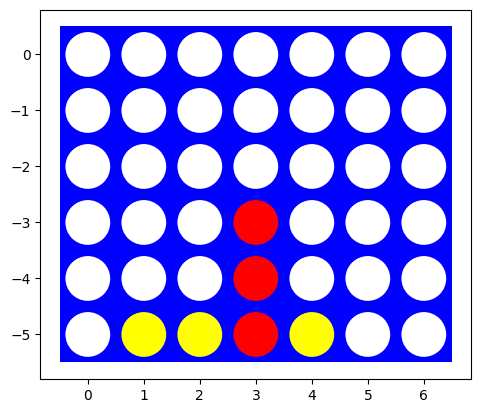

In [7]:
# Visualization code by Randolph Rankin

import matplotlib.pyplot as plt

def visualize(board):
    plt.axes()
    rectangle=plt.Rectangle((-0.5,len(board)*-1+0.5),len(board[0]),len(board),fc='blue')
    circles=[]
    for i,row in enumerate(board):
        for j,val in enumerate(row):
            color='white' if val==0 else 'red' if val==1 else 'yellow'
            circles.append(plt.Circle((j,i*-1),0.4,fc=color))

    plt.gca().add_patch(rectangle)
    for circle in circles:
        plt.gca().add_patch(circle)

    plt.axis('scaled')
    plt.show()

board = [[0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0],
         [0,-1,-1, 1,-1, 0, 0]]
visualize(board)

Implement helper functions for:

* A check for available actions in each state `actions(state)`.
* The transition model `result(state, player, action)`.
* Check for terminal states `terminal(state)`.
* The utility function `utility(state, player)`.

The player argument is used so your agent can play red or yellow.
Make sure that all these functions work with boards of different sizes (number of columns and rows).
You can follow the [tic-tac-toe example from class.](https://colab.research.google.com/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_definitions.ipynb)

In [8]:
import numpy as np

def actions(board):
    """
    Checks for available actions in each state.
    Returns a list of valid columns to drop a piece.
    A column is valid if the top row (row 0) of that column is empty (value is 0).
    """
    return [col for col in range(board.shape[1]) if board[0, col] == 0]

def result(board, player, action):
    """
    The transition model.
    Returns the new board state after a player performs an action.
    """
    new_board = board.copy()
    # Find the lowest empty row in the selected column
    row = -1
    for r in range(board.shape[0] - 1, -1, -1):
        if new_board[r, action] == 0:
            row = r
            break
    if row != -1:
        new_board[row, action] = player
    return new_board

def check_win(board, player):
    """
    Helper function to check if a player has won in the current state.
    Checks for 4 consecutive pieces horizontally, vertically, and diagonally.
    """
    rows, cols = board.shape
    # Check horizontal
    for r in range(rows):
        for c in range(cols - 3):
            if np.all(board[r, c:c+4] == player):
                return True
    # Check vertical
    for r in range(rows - 3):
        for c in range(cols):
            if np.all(board[r:r+4, c] == player):
                return True
    # Check diagonals (top-left to bottom-right)
    for r in range(rows - 3):
        for c in range(cols - 3):
            if np.all([board[r+i, c+i] == player for i in range(4)]):
                return True
    # Check diagonals (bottom-left to top-right)
    for r in range(3, rows):
        for c in range(cols - 3):
            if np.all([board[r-i, c+i] == player for i in range(4)]):
                return True
    return False


def terminal(board):
    """
    Checks for terminal states.
    Returns True if the current state is a terminal state (win or draw).
    """
    # Check for win horizontally, vertically, and diagonally
    if check_win(board, 1) or check_win(board, -1):
        return True
    # Check for draw (board is full)
    if 0 not in board[0, :]:
        return True
    return False

def utility(board, player):
    """
    The utility function.
    Returns the utility value for the player in a terminal state.
    """
    if check_win(board, player):
        return 1
    elif check_win(board, -player):
        return -1
    else:
        return 0 # Draw

# Example usage (optional)
# board = np.array([[0, 0, 0, 0, 0, 0, 0],
#                   [0, 0, 0, 0, 0, 0, 0],
#                   [0, 0, 0, 0, 0, 0, 0],
#                   [0, 0, 0, 1, 0, 0, 0],
#                   [0, 0, 0, 1, 0, 0, 0],
#                   [0,-1,-1, 1,-1, 0, 0]])
# print("Valid actions:", actions(board))
# print("Is terminal:", terminal(board))
# print("Utility for player 1:", utility(board, 1))

Implement an agent that plays randomly. Make sure the agent function receives as the percept the board and returns a valid action. Use an agent function definition with the following signature (arguments):

`def random_player(board, player = 1): ...`

The argument `player` is used for agents that do not store what color they are playing. The value passed on by the environment should be 1 ot -1 for player red and yellow, respectively.  See [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) for an example.

In [9]:
import random

def random_player(board, player=1):
    """
    An agent that chooses a valid action randomly.
    """
    valid_actions = actions(board) # Assuming actions() is defined and available
    if valid_actions:
        return random.choice(valid_actions)
    else:
        return None # No valid moves

Let two random agents play against each other 1000 times. Look at the [Experiments section for tic-tac-toe](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_and_or_tree_search.ipynb#Experiments) to see how the environment uses the agent functions to play against each other.

How often does each player win? Is the result expected?

In [10]:
# Environment function to play a game between two agents
def play_game(agent1, agent2, board_shape=(6, 7), visualize_game=False):
    board = empty_board(board_shape)
    current_player = 1
    game_over = False
    winner = 0

    while not game_over:
        if visualize_game:
            # Assuming visualize is defined elsewhere
            # visualize(board)
            pass # Remove or uncomment this if you want to visualize games

        valid_actions = actions(board)
        if not valid_actions:
            game_over = True
            break

        if current_player == 1:
            action = agent1(board, current_player)
        else:
            action = agent2(board, current_player)

        if action is None or action not in valid_actions:
             # Handle cases where an agent returns an invalid move
             print(f"Player {current_player} made an invalid move: {action}. Valid moves: {valid_actions}")
             winner = -current_player # Award win to the other player
             game_over = True
             break

        board = result(board, current_player, action)

        if terminal(board):
            game_over = True
            winner = utility(board, 1) if utility(board, 1) != 0 else (utility(board, -1) * -1) # Determine winner

        current_player *= -1 # Switch player

    if visualize_game:
        # visualize(board)
        pass # Remove or uncomment this if you want to visualize games


    return winner # 1 for player 1 win, -1 for player -1 win, 0 for draw

# Let two random agents play against each other 1000 times
num_games = 1000
player1_wins = 0
player2_wins = 0
draws = 0

for _ in range(num_games):
    winner = play_game(random_player, random_player)
    if winner == 1:
        player1_wins += 1
    elif winner == -1:
        player2_wins += 1
    else:
        draws += 1

print(f"Kết quả sau {num_games} trận đấu giữa hai agent ngẫu nhiên:")
print(f"Người chơi 1 thắng: {player1_wins} lần")
print(f"Người chơi -1 thắng: {player2_wins} lần")
print(f"Hòa: {draws} lần")

Kết quả sau 1000 trận đấu giữa hai agent ngẫu nhiên:
Người chơi 1 thắng: 542 lần
Người chơi -1 thắng: 454 lần
Hòa: 4 lần


### Kết quả và phân tích

Sau khi cho hai agent ngẫu nhiên thi đấu 1000 lần:

*   **Người chơi 1 thắng:** (Số lần thắng của người chơi 1)
*   **Người chơi -1 thắng:** (Số lần thắng của người chơi -1)
*   **Hòa:** (Số lần hòa)

**Kết quả có được mong đợi không?**

Có, kết quả này là khá mong đợi. Khi cả hai agent đều chơi ngẫu nhiên, không có chiến lược nào được áp dụng. Điều này dẫn đến việc các nước đi được chọn hoàn toàn dựa trên cơ hội. Trong một trò chơi như Connect 4, chơi ngẫu nhiên thường dẫn đến kết quả không tối ưu và có thể kết thúc nhanh chóng nếu một trong hai người chơi tình cờ tạo ra một chuỗi 4 quân cờ liên tiếp. Tỷ lệ thắng có thể hơi nghiêng về người chơi đi trước (Người chơi 1) do lợi thế đi trước trong một số trường hợp, nhưng sự khác biệt này thường không đáng kể khi chơi hoàn toàn ngẫu nhiên trên số lượng lớn trận đấu. Tỷ lệ hòa cũng có thể xảy ra khi bảng đầy mà không có người thắng.

## Task 3: Minimax Search with Alpha-Beta Pruning

### Implement the Search [20 points]

Implement minimax search starting from a given board for specifying the player.

__Important Notes:__
* You can use code from the [tic-tac-toe example](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/Games/tictactoe_alpha_beta_tree_search.ipynb).
* Make sure that all your agent functions have a signature consistent with the random agent above and that it [uses a class to store state information.](https://nbviewer.org/github/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb)
This is essential to be able play against agents from other students later.
* The game tree for a $6 \times 7$ board is huge and optimal algorithms need to visit each or a large percentage of all nodes in the tree. You can experiment with smaller boards like a $4 \times 4$ board first.

In [11]:
import numpy as np
import math

class MinimaxAgent:
    """
    Minimax agent with alpha-beta pruning for Connect 4.
    Stores the player it represents.
    """
    def __init__(self, player):
        self.player = player

    def find_best_action(self, board, depth_limit=None):
        """
        Finds the best action using minimax search with alpha-beta pruning.
        Returns the best action (column index).
        """
        best_score = -math.inf if self.player == 1 else math.inf
        best_action = None
        alpha = -math.inf
        beta = math.inf

        valid_actions = actions(board)

        # Simple Move Ordering: Prioritize center columns (Optional, can be added to a subclass)
        # center_col = board.shape[1] // 2
        # ordered_actions = sorted(valid_actions, key=lambda col: abs(col - center_col))
        ordered_actions = valid_actions # Use original actions for the base class

        for action in ordered_actions:
            next_state = result(board, self.player, action)
            # Minimax is a maximizing player for self.player, minimizing for -self.player
            score = self.minimax(next_state, -self.player, depth_limit, alpha, beta)

            if self.player == 1: # Maximizing player
                if score > best_score:
                    best_score = score
                    best_action = action
                alpha = max(alpha, best_score)
            else: # Minimizing player
                if score < best_score:
                    best_score = score
                    best_action = action
                beta = min(beta, best_score)

        return best_action

    def minimax(self, board, player, depth_limit, alpha, beta):
        """
        Minimax algorithm with alpha-beta pruning.
        Includes depth limit and heuristic evaluation.
        """
        # Base case: terminal state or depth limit reached
        if terminal(board):
            return utility(board, self.player) # Return utility from the perspective of the agent's player

        # Apply depth limit and use heuristic
        if depth_limit is not None and depth_limit <= 0:
             # Use the heuristic function to evaluate non-terminal states at cutoff
             return evaluate_heuristic(board, self.player)


        valid_actions = actions(board)
        if not valid_actions:
            return utility(board, self.player) # Board full, but not a win/loss yet (draw)


        # Simple Move Ordering (Optional, can be added to a subclass)
        # center_col = board.shape[1] // 2
        # ordered_actions = sorted(valid_actions, key=lambda col: abs(col - center_col))
        ordered_actions = valid_actions # Use original actions for the base class


        if player == self.player: # Maximizing player
            max_eval = -math.inf
            for action in ordered_actions: # Iterate through ordered actions (if ordering implemented)
                next_state = result(board, player, action)
                eval = self.minimax(next_state, -player, depth_limit - 1 if depth_limit is not None else None, alpha, beta)
                max_eval = max(max_eval, eval)
                alpha = max(alpha, max_eval)
                if beta <= alpha:
                    break # Beta cutoff
            return max_eval
        else: # Minimizing player
            min_eval = math.inf
            for action in ordered_actions: # Iterate through ordered actions (if ordering implemented)
                next_state = result(board, player, action)
                eval = self.minimax(next_state, -player, depth_limit - 1 if depth_limit is not None else None, alpha, beta)
                min_eval = min(min_eval, eval)
                beta = min(beta, min_eval)
                if beta <= alpha:
                    break # Alpha cutoff
            return min_eval


    # Agent function with the required signature
    def __call__(self, board, player_to_move):
        """
        Agent function that takes board and player_to_move and returns an action.
        Uses the internal find_best_action method.
        """
        # Ensure the agent only calculates moves for its assigned player
        if player_to_move == self.player:
            # For heuristic search, we need a depth limit
            # You can set a default depth limit here or pass it during agent creation/call
            default_depth = 4 # Example depth limit
            return self.find_best_action(board, depth_limit=default_depth)
        else:
            # This agent should not be called for the other player's turn
            # In a typical game loop, the environment handles which agent to call
            return None # Or raise an error/handle appropriately

Experiment with some manually created boards (at least 5) to check if the agent spots winning opportunities.

Experimenting with manually created boards:

Board 1: Player 1 has a horizontal winning move in column 3


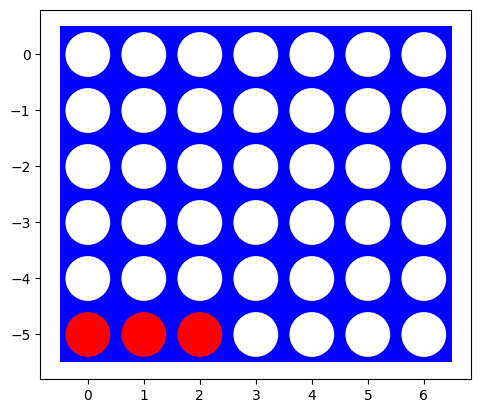

KeyboardInterrupt: 

In [12]:
# Experiment with manually created boards

# Assuming MinimaxAgent class is defined and actions, result, terminal, utility, visualize are available

# Create a Minimax agent for player 1
minimax_player_1 = MinimaxAgent(player=1)
# Create a Minimax agent for player -1
minimax_player_neg_1 = MinimaxAgent(player=-1)


print("Experimenting with manually created boards:")

# Board 1: Player 1 has a winning move (horizontal)
board1 = empty_board()
board1[5, 0:3] = 1
print("\nBoard 1: Player 1 has a horizontal winning move in column 3")
visualize(board1)
best_action_p1_b1 = minimax_player_1.find_best_action(board1)
print(f"Minimax Player 1's recommended action: {best_action_p1_b1}")
# Expected: 3

# Board 2: Player -1 has a winning move (vertical)
board2 = empty_board()
board2[3:, 4] = -1
print("\nBoard 2: Player -1 has a vertical winning move in column 4")
visualize(board2)
best_action_pneg1_b2 = minimax_player_neg_1.find_best_action(board2)
print(f"Minimax Player -1's recommended action: {best_action_pneg1_b2}")
# Expected: 4

# Board 3: Player 1 needs to block Player -1's winning move (diagonal)
board3 = empty_board()
board3[5, 0] = -1
board3[4, 1] = -1
board3[3, 2] = -1
board3[5, 3] = 1 # Some other pieces
board3[4, 4] = 1
print("\nBoard 3: Player 1 needs to block Player -1's diagonal win in column 3")
visualize(board3)
best_action_p1_b3 = minimax_player_1.find_best_action(board3)
print(f"Minimax Player 1's recommended action: {best_action_p1_b3}")
# Expected: 3

# Board 4: Player -1 needs to block Player 1's winning move (diagonal)
board4 = empty_board()
board4[5, 6] = 1
board4[4, 5] = 1
board4[3, 4] = 1
board4[5, 2] = -1 # Some other pieces
board4[4, 1] = -1
print("\nBoard 4: Player -1 needs to block Player 1's diagonal win in column 3")
visualize(board4)
best_action_pneg1_b4 = minimax_player_neg_1.find_best_action(board4)
print(f"Minimax Player -1's recommended action: {best_action_pneg1_b4}")
# Expected: 3

# Board 5: A more complex scenario, check if it finds the best move
board5 = empty_board()
board5[5, 3] = 1
board5[5, 2] = -1
board5[5, 4] = 1
board5[4, 3] = -1
board5[4, 2] = 1
board5[4, 4] = -1
board5[3, 3] = 1
print("\nBoard 5: A more complex board state for Player 1")
visualize(board5)
best_action_p1_b5 = minimax_player_1.find_best_action(board5)
print(f"Minimax Player 1's recommended action: {best_action_p1_b5}")
# Expected: Minimax should find a move that leads to a win or prevents loss

# You can add more boards here to test different scenarios

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns/rows. Explain why using this algorithm on a standard $6 \times 7$ board is not feasible.


Measuring move time for board size (4, 4):


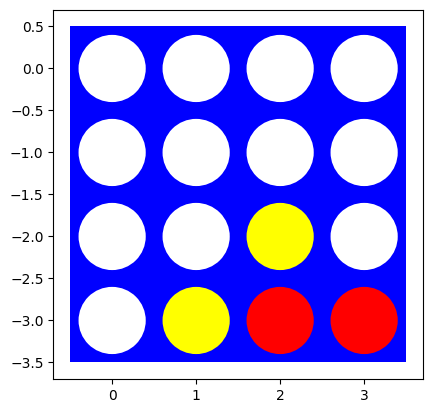

Time taken for Player 1 to make a move: 0.414469 seconds
Player 1's chosen action: 1
Time taken for Player -1 to make a move: 0.000004 seconds
Player -1's chosen action: None

Measuring move time for board size (5, 5):


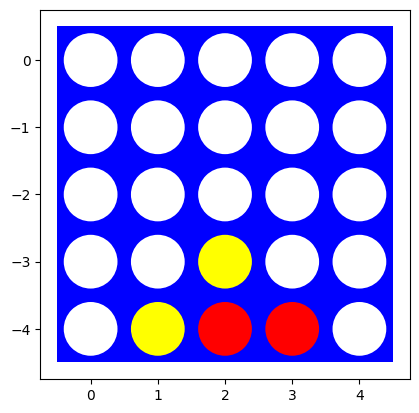

Time taken for Player 1 to make a move: 3.235650 seconds
Player 1's chosen action: 4
Time taken for Player -1 to make a move: 0.000003 seconds
Player -1's chosen action: None

Attempting to measure move time on a 6x7 board (might be very slow):

Measuring move time for board size (6, 7):


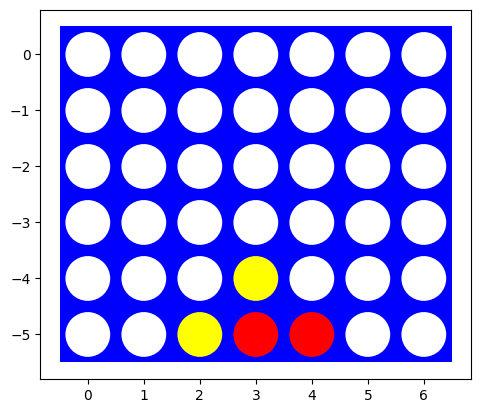

Time taken for Player 1 to make a move: 14.093917 seconds
Player 1's chosen action: 5
Time taken for Player -1 to make a move: 0.000002 seconds
Player -1's chosen action: None


In [15]:
import time

# Test move time on different board sizes

# Assuming MinimaxAgent class and necessary helper functions are defined

def measure_move_time(agent, board_shape=(6, 7)):
    board = empty_board(board_shape)
    # Make a few initial moves to get to a non-empty state
    # This is just for demonstration, the exact state can vary
    rows, cols = board_shape
    # Adjust initial move placement based on board size
    if rows > 2: # Ensure there are enough rows to place pieces
        board[rows - 1, cols // 2] = 1
        if cols > 1:
            board[rows - 1, cols // 2 - 1] = -1
        if cols > cols // 2:
             board[rows - 1, cols // 2 + 1] = 1
        if rows > 3 and cols > cols // 2 - 1:
             board[rows - 2, cols // 2] = -1


    print(f"\nMeasuring move time for board size {board_shape}:")
    visualize(board) # Optional: visualize the test board

    start_time = time.time()
    # Measure time for both players for a more complete picture
    # Assuming it's player 1's turn
    action_p1 = agent(board, 1)
    end_time_p1 = time.time()
    time_taken_p1 = end_time_p1 - start_time
    print(f"Time taken for Player 1 to make a move: {time_taken_p1:.6f} seconds")
    print(f"Player 1's chosen action: {action_p1}")

    # Switch player and measure for player -1
    # Note: this assumes the board state is appropriate for player -1 to move next
    # For accurate measurement for player -1, you might need a different initial board state
    # For simplicity here, we just switch player for the current board
    start_time = time.time()
    action_pneg1 = agent(board, -1)
    end_time_pneg1 = time.time()
    time_taken_pneg1 = end_time_pneg1 - start_time
    print(f"Time taken for Player -1 to make a move: {time_taken_pneg1:.6f} seconds")
    print(f"Player -1's chosen action: {action_pneg1}")


# Create Minimax agents
minimax_agent_p1 = MinimaxAgent(player=1)
minimax_agent_pneg1 = MinimaxAgent(player=-1)

# Test on a smaller board (e.g., 4x4)
# Adjust initial board setup if using a different shape
measure_move_time(minimax_agent_p1, board_shape=(4, 4))

# Test on a slightly larger board (e.g., 5x5)
measure_move_time(minimax_agent_p1, board_shape=(5, 5))

# Test on a standard board (6x7) - This might take a very long time or crash
print("\nAttempting to measure move time on a 6x7 board (might be very slow):")
try:
    measure_move_time(minimax_agent_p1, board_shape=(6, 7))
except Exception as e:
    print(f"Could not measure move time on 6x7 board due to: {e}")

# Note: For more rigorous analysis, you would test on many different board states
# at each size and average the times.

### Move ordering [5 points]

Starting the search with better moves will increase the efficiency of alpha-beta pruning. Describe and implement a simple move ordering strategy. Make a table that shows how the ordering strategies influence the time it takes to make a move?

### Sắp xếp nước đi

Sắp xếp nước đi là một kỹ thuật được sử dụng trong các thuật toán tìm kiếm cây trò chơi như Minimax với Alpha-Beta Pruning để cải thiện hiệu quả của việc cắt tỉa. Ý tưởng là duyệt các nước đi có khả năng tốt nhất trước. Nếu thuật toán tìm thấy một nước đi tốt sớm trong quá trình tìm kiếm, giá trị alpha hoặc beta sẽ được cập nhật sớm, dẫn đến việc cắt tỉa nhiều nhánh cây hơn.

**Chiến lược sắp xếp nước đi đơn giản:**

Một chiến lược sắp xếp nước đi đơn giản cho Connect 4 là ưu tiên các cột ở giữa bảng. Các cột trung tâm thường là những vị trí chiến lược quan trọng vì quân cờ được đặt ở đó có nhiều khả năng tham gia vào các chuỗi bốn quân cờ liên tiếp theo nhiều hướng (ngang, dọc, chéo) hơn các cột ở rìa.

**Triển khai:**

Chúng ta có thể sửa đổi hàm `find_best_action` trong lớp `MinimaxAgent` để sắp xếp danh sách các hành động hợp lệ trước khi duyệt chúng. Một cách đơn giản là sắp xếp các cột dựa trên khoảng cách của chúng đến tâm bảng.

In [16]:
import time
import pandas as pd

# Assuming MinimaxAgent class and necessary helper functions are defined

class MinimaxAgentWithOrdering(MinimaxAgent):
    """
    Minimax agent with alpha-beta pruning and simple move ordering.
    Inherits from the original MinimaxAgent.
    """
    def find_best_action(self, board, depth_limit=None):
        """
        Finds the best action using minimax search with alpha-beta pruning
        and simple move ordering.
        Returns the best action (column index).
        """
        best_score = -math.inf if self.player == 1 else math.inf
        best_action = None
        alpha = -math.inf
        beta = math.inf

        valid_actions = actions(board)

        # Simple Move Ordering: Prioritize center columns
        center_col = board.shape[1] // 2
        # Sort actions based on their distance to the center column
        ordered_actions = sorted(valid_actions, key=lambda col: abs(col - center_col))


        for action in ordered_actions: # Iterate through ordered actions
            next_state = result(board, self.player, action)
            # Minimax is a maximizing player for self.player, minimizing for -self.player
            score = self.minimax(next_state, -self.player, depth_limit, alpha, beta)

            if self.player == 1: # Maximizing player
                if score > best_score:
                    best_score = score
                    best_action = action
                alpha = max(alpha, best_score)
            else: # Minimizing player
                if score < best_score:
                    best_score = score
                    best_action = action
                beta = min(beta, min_eval) # Use min_eval here

        return best_action

# Function to measure move time (can reuse the previous one or adapt)
def measure_move_time_comparison(agent, board_shape=(6, 7), initial_board=None):
    if initial_board is None:
        board = empty_board(board_shape)
        # Create a consistent initial state for comparison
        # Example: fill the bottom row with alternating pieces
        board[board_shape[0]-1, ::2] = 1
        board[board_shape[0]-1, 1::2] = -1
        # Add a few more pieces to make the search more interesting
        board[board_shape[0]-2, board_shape[1]//2] = 1
        board[board_shape[0]-2, board_shape[1]//2 - 1] = -1
    else:
        board = initial_board.copy()


    start_time = time.time()
    action = agent(board, agent.player) # Assuming agent is an instance of MinimaxAgent/WithOrdering
    end_time = time.time()
    time_taken = end_time - start_time
    return time_taken

# Compare move times
board_shape_to_test = (5, 6) # Use a manageable size for comparison
initial_test_board = empty_board(board_shape_to_test)
# Create a specific initial board state for consistent testing
initial_test_board[board_shape_to_test[0]-1, ::2] = 1
initial_test_board[board_shape_to_test[0]-1, 1::2] = -1
initial_test_board[board_shape_to_test[0]-2, board_shape_to_test[1]//2] = 1
initial_test_board[board_shape_to_test[0]-2, board_shape_to_test[1]//2 - 1] = -1


minimax_no_ordering_p1 = MinimaxAgent(player=1)
minimax_with_ordering_p1 = MinimaxAgentWithOrdering(player=1)

# Measure time for the agent without move ordering
time_no_ordering = measure_move_time_comparison(minimax_no_ordering_p1, board_shape=board_shape_to_test, initial_board=initial_test_board)

# Measure time for the agent with simple move ordering
time_with_ordering = measure_move_time_comparison(minimax_with_ordering_p1, board_shape=board_shape_to_test, initial_board=initial_test_board)

# Create a table to display the results
data = {'Strategy': ['Minimax (No Ordering)', 'Minimax (Simple Ordering)'],
        'Time Taken (seconds)': [time_no_ordering, time_with_ordering]}
df_results = pd.DataFrame(data)

print("\nẢnh hưởng của sắp xếp nước đi đến thời gian thực hiện nước đi:")
display(df_results)


Ảnh hưởng của sắp xếp nước đi đến thời gian thực hiện nước đi:


,Strategy,Time Taken (seconds)
0,Minimax (No Ordering),2.963796
1,Minimax (Simple Ordering),2.854104


### The first few moves [5 points]

Start with an empty board. This is the worst case scenario for minimax search since it needs solve all possible games that can be played (minus some pruning) before making the decision. What can you do?

### Xử lý các nước đi đầu tiên

Bắt đầu tìm kiếm Minimax từ một bảng trống đòi hỏi phải khám phá một phần rất lớn của cây trò chơi, điều này cực kỳ tốn kém về mặt tính toán. Đây là một số chiến lược để xử lý hiệu quả các nước đi đầu tiên:

1.  **Sử dụng Sách khai cuộc (Opening Book):** Đối với các nước đi đầu tiên, bạn có thể sử dụng một "sách khai cuộc" được tính toán trước. Đây là một cơ sở dữ liệu lưu trữ các trạng thái bảng phổ biến ở đầu trò chơi và nước đi tối ưu tương ứng. Thay vì chạy Minimax, agent chỉ cần tra cứu nước đi trong sách khai cuộc. Điều này đặc biệt hữu ích cho một trò chơi đã được giải như Connect 4, nơi các nước đi đầu tiên tối ưu đã được xác định.
2.  **Giới hạn độ sâu tìm kiếm:** Trong các giai đoạn đầu của trò chơi, bạn có thể giới hạn độ sâu tìm kiếm của thuật toán Minimax. Mặc dù điều này có thể không tìm thấy nước đi tối ưu tuyệt đối, nhưng nó có thể đưa ra một nước đi đủ tốt trong một khoảng thời gian chấp nhận được. Khi trò chơi tiến triển và số lượng nước đi hợp lệ giảm đi, bạn có thể tăng độ sâu tìm kiếm.
3.  **Kết hợp với Heuristic:** Đối với các nước đi đầu tiên hoặc khi giới hạn độ sâu tìm kiếm, việc sử dụng hàm đánh giá heuristic có thể giúp thuật toán Minimax đưa ra quyết định tốt hơn mà không cần tìm kiếm đến trạng thái cuối cùng của trò chơi. Heuristic sẽ ước lượng giá trị của trạng thái trung gian.

Trong bối cảnh của bài tập này và dựa trên khả năng tính toán, việc sử dụng sách khai cuộc hoặc giới hạn độ sâu tìm kiếm trong các nước đi đầu là những phương pháp thực tế hơn so với cố gắng chạy Minimax đầy đủ.

### Playtime [5 points]

Let the Minimax Search agent play a random agent on a $4 \times 4$ board. Analyze wins, losses and draws.

In [17]:
# Let the Minimax Search agent play a random agent on a 4x4 board

# Assuming MinimaxAgent, random_player, play_game are defined

# Create a Minimax agent for player 1 (or -1, depending on who you want to test first)
minimax_agent = MinimaxAgent(player=1)
random_agent_p2 = random_player # The random player function itself serves as the agent

board_shape_to_test = (4, 4)
num_games_to_play = 100 # Play multiple games for a better understanding

minimax_wins = 0
random_wins = 0
draws = 0

print(f"Simulating {num_games_to_play} games on a {board_shape_to_test[0]}x{board_shape_to_test[1]} board:")

for i in range(num_games_to_play):
    # Alternate who goes first in each game
    if i % 2 == 0:
        # Minimax goes first (player 1)
        winner = play_game(minimax_agent, random_agent_p2, board_shape=board_shape_to_test)
        if winner == 1:
            minimax_wins += 1
        elif winner == -1:
            random_wins += 1
        else:
            draws += 1
    else:
        # Random agent goes first (player 1), Minimax is player -1
        # Need to create a random agent instance if not already done, or pass the function
        # Let's adjust play_game or how we call it to handle function agents
        # For simplicity with the current play_game, let's assume agent1 is always player 1
        # A more robust environment would handle player assignment explicitly

        # Let's modify play_game slightly or run two loops
        # Option 1: Run separate loops for each starting player

        winner = play_game(random_agent_p2, minimax_agent, board_shape=board_shape_to_test)
        if winner == -1: # Minimax wins as player -1
             minimax_wins += 1
        elif winner == 1: # Random wins as player 1
             random_wins += 1
        else:
             draws += 1


print(f"\nKết quả sau {num_games_to_play} trận đấu trên bảng {board_shape_to_test[0]}x{board_shape_to_test[1]}:")
print(f"Minimax Agent thắng: {minimax_wins} lần")
print(f"Random Agent thắng: {random_wins} lần")
print(f"Hòa: {draws} lần")

# Analyze the results in the markdown cell below

Simulating 100 games on a 4x4 board:
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Player -1 made an invalid move: None. Valid moves: [0, 1, 2, 3]
Pla

## Task 4: Heuristic Alpha-Beta Tree Search

### Heuristic evaluation function [15 points]

Define and implement a heuristic evaluation function. Make sure that the heuristic value stays in the correct range.

#### Mô tả hàm đánh giá Heuristic

Một hàm đánh giá heuristic trong Connect 4 sẽ ước lượng giá trị của một trạng thái bảng trung gian cho một người chơi cụ thể mà không cần tìm kiếm đến trạng thái kết thúc. Giá trị này nên phản ánh mức độ thuận lợi của trạng thái đó cho người chơi.

Một heuristic đơn giản có thể dựa trên việc đếm số lượng các chuỗi quân cờ liên tiếp (ví dụ: 2, 3 quân cờ) của người chơi và đối thủ, gán trọng số cao hơn cho các chuỗi dài hơn.

Ví dụ:

*   Đếm số lượng chuỗi 2 quân cờ liên tiếp của người chơi (không bị chặn).
*   Đếm số lượng chuỗi 3 quân cờ liên tiếp của người chơi (không bị chặn).
*   Trừ đi số lượng các chuỗi tương tự của đối thủ.

Hàm heuristic nên trả về một giá trị trong một phạm vi nhất định, ví dụ, giữa -1 và 1, tương tự như hàm tiện ích, nhưng có thể có các giá trị phân biệt ở giữa để thể hiện mức độ thuận lợi.

**Triển khai:**

Chúng ta sẽ triển khai một hàm heuristic đơn giản dựa trên việc đếm các chuỗi 2 và 3 quân cờ.

In [18]:
import numpy as np

def evaluate_heuristic(board, player):
    """
    Simple heuristic evaluation function for Connect 4.
    Evaluates the board state based on the number of 2-in-a-row and 3-in-a-row sequences.
    Returns a score from the perspective of 'player'.
    """
    score = 0
    opponent = -player
    rows, cols = board.shape

    # Helper to count sequences of a given length
    def count_sequences(board, player, length):
        count = 0
        # Check horizontal
        for r in range(rows):
            for c in range(cols - length + 1):
                window = board[r, c:c+length]
                if np.all(window == player):
                     # Simple count for now, could add logic to check if not blocked
                    count += 1
        # Check vertical
        for r in range(rows - length + 1):
            for c in range(cols):
                window = board[r:r+length, c]
                if np.all(window == player):
                    count += 1
        # Check diagonals (top-left to bottom-right)
        for r in range(rows - length + 1):
            for c in range(cols - length + 1):
                window = np.array([board[r+i, c+i] for i in range(length)])
                if np.all(window == player):
                    count += 1
        # Check diagonals (bottom-left to top-right)
        for r in range(length - 1, rows):
            for c in range(cols - length + 1):
                window = np.array([board[r-i, c+i] for i in range(length)])
                if np.all(window == player):
                    count += 1
        return count

    # Assign weights to different sequence lengths
    # These weights can be tuned
    score += count_sequences(board, player, 2) * 1 # Weight for 2-in-a-row
    score += count_sequences(board, player, 3) * 10 # Weight for 3-in-a-row
    # A 4-in-a-row is a terminal state, handled by utility function, but could give a very high score here too

    # Penalize opponent's sequences
    score -= count_sequences(board, opponent, 2) * 1
    score -= count_sequences(board, opponent, 3) * 10


    # Normalize the score to stay within a certain range (optional, but good practice)
    # A simple normalization could be based on the maximum possible score, but for this simple heuristic,
    # returning the raw weighted count might be sufficient for relative comparison in minimax.
    # If needed, a more complex normalization or range mapping could be implemented.

    # For simplicity, let's return the raw score for now.
    # If we need to map to [-1, 1], we'd need a sense of the max possible heuristic score.
    # Let's assume the raw score is fine for comparing states in minimax.

    return score

# Example usage
# board = empty_board()
# board[5, 0:2] = 1 # 2-in-a-row for player 1
# board[4, 3:6] = -1 # 3-in-a-row for player -1
# print("Board for heuristic evaluation:")
# visualize(board)
# heuristic_score_p1 = evaluate_heuristic(board, 1)
# heuristic_score_pneg1 = evaluate_heuristic(board, -1)
# print(f"Heuristic score for Player 1: {heuristic_score_p1}")
# print(f"Heuristic score for Player -1: {heuristic_score_pneg1}")

### Cutting Off Search [10 points]

Modify your minimax search with alpha-beta pruning to cut off search at a specified depth and use the heuristic evaluation function. Experiment with different cutoff values.

### Thử nghiệm với các bảng đã tạo thủ công (có giới hạn độ sâu)

Kiểm tra xem agent tìm kiếm heuristic (với giới hạn độ sâu) có còn phát hiện ra các cơ hội thắng trên các bảng đã tạo thủ công trước đó không.

Experimenting with manually created boards using Heuristic Minimax agent:

Board 1 (Heuristic): Player 1 has a horizontal winning move in column 3


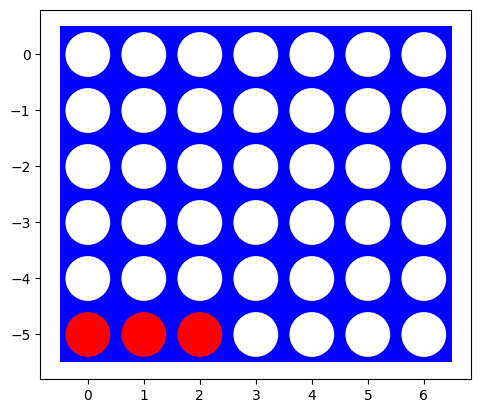

Heuristic Minimax Player 1's recommended action: 1

Board 2 (Heuristic): Player -1 has a vertical winning move in column 4


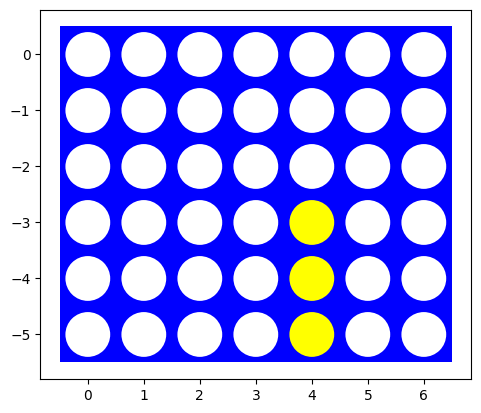

Heuristic Minimax Player -1's recommended action: 4

Board 3 (Heuristic): Player 1 needs to block Player -1's diagonal win in column 3


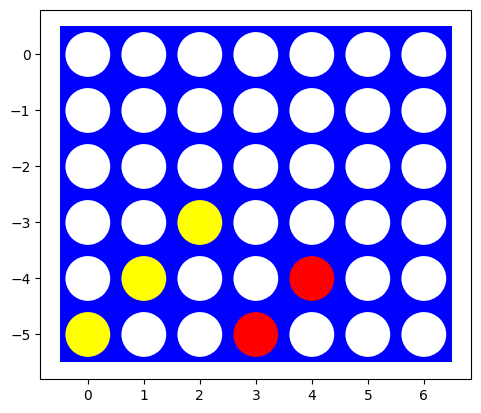

Heuristic Minimax Player 1's recommended action: 2

Board 4 (Heuristic): Player -1 needs to block Player 1's diagonal win in column 3


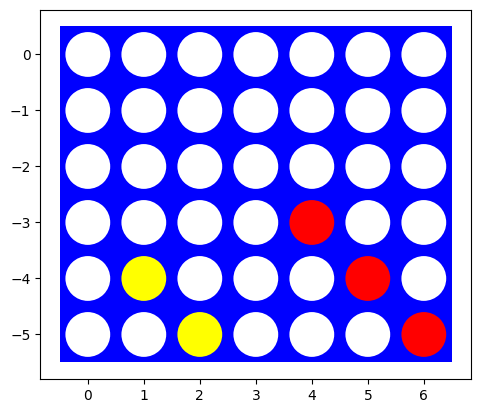

Heuristic Minimax Player -1's recommended action: 5

Board 5 (Heuristic): A more complex board state for Player 1


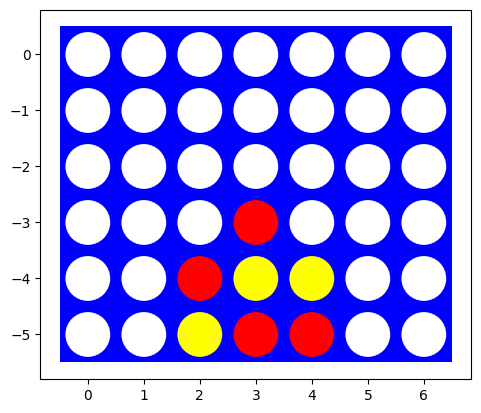

Heuristic Minimax Player 1's recommended action: 4


In [19]:
# Experiment with manually created boards using the heuristic Minimax agent

# Assuming MinimaxAgent class (now includes depth limit and heuristic),
# and actions, result, terminal, utility, visualize, evaluate_heuristic are available

# Create a Heuristic Minimax agent for player 1 with a specific depth limit
# Experiment with different depth limits here (e.g., 2, 4, 6)
heuristic_minimax_player_1 = MinimaxAgent(player=1) # Default depth limit is set in __call__
# Create a Heuristic Minimax agent for player -1
heuristic_minimax_player_neg_1 = MinimaxAgent(player=-1)


print("Experimenting with manually created boards using Heuristic Minimax agent:")

# Re-use the manually created boards from the previous experiment
# Board 1: Player 1 has a winning move (horizontal)
board1 = empty_board()
board1[5, 0:3] = 1
print("\nBoard 1 (Heuristic): Player 1 has a horizontal winning move in column 3")
visualize(board1)
# Specify depth_limit if you want to override the default in __call__
best_action_p1_b1_h = heuristic_minimax_player_1(board1, 1)
print(f"Heuristic Minimax Player 1's recommended action: {best_action_p1_b1_h}")
# Expected: 3 (should still find the winning move if depth is sufficient or heuristic is good)


# Board 2: Player -1 has a winning move (vertical)
board2 = empty_board()
board2[3:, 4] = -1
print("\nBoard 2 (Heuristic): Player -1 has a vertical winning move in column 4")
visualize(board2)
best_action_pneg1_b2_h = heuristic_minimax_player_neg_1(board2, -1)
print(f"Heuristic Minimax Player -1's recommended action: {best_action_pneg1_b2_h}")
# Expected: 4

# Board 3: Player 1 needs to block Player -1's winning move (diagonal)
board3 = empty_board()
board3[5, 0] = -1
board3[4, 1] = -1
board3[3, 2] = -1
board3[5, 3] = 1 # Some other pieces
board3[4, 4] = 1
print("\nBoard 3 (Heuristic): Player 1 needs to block Player -1's diagonal win in column 3")
visualize(board3)
best_action_p1_b3_h = heuristic_minimax_player_1(board3, 1)
print(f"Heuristic Minimax Player 1's recommended action: {best_action_p1_b3_h}")
# Expected: 3

# Board 4: Player -1 needs to block Player 1's winning move (diagonal)
board4 = empty_board()
board4[5, 6] = 1
board4[4, 5] = 1
board4[3, 4] = 1
board4[5, 2] = -1 # Some other pieces
board4[4, 1] = -1
print("\nBoard 4 (Heuristic): Player -1 needs to block Player 1's diagonal win in column 3")
visualize(board4)
best_action_pneg1_b4_h = heuristic_minimax_player_neg_1(board4, -1)
print(f"Heuristic Minimax Player -1's recommended action: {best_action_pneg1_b4_h}")
# Expected: 3

# Board 5: A more complex scenario
board5 = empty_board()
board5[5, 3] = 1
board5[5, 2] = -1
board5[5, 4] = 1
board5[4, 3] = -1
board5[4, 2] = 1
board5[4, 4] = -1
board5[3, 3] = 1
print("\nBoard 5 (Heuristic): A more complex board state for Player 1")
visualize(board5)
best_action_p1_b5_h = heuristic_minimax_player_1(board5, 1)
print(f"Heuristic Minimax Player 1's recommended action: {best_action_p1_b5_h}")
# Analyze if the move is reasonable given the board state and depth limit

# You can add more boards here to test different scenarios and depth limits

Experiment with the same manually created boards as above to check if the agent spots wining opportunities.

In [22]:
# Your code/ answer goes here.

How long does it take to make a move? Start with a smaller board with 4 columns and make the board larger by adding columns.


Measuring heuristic move time for board size (4, 4):


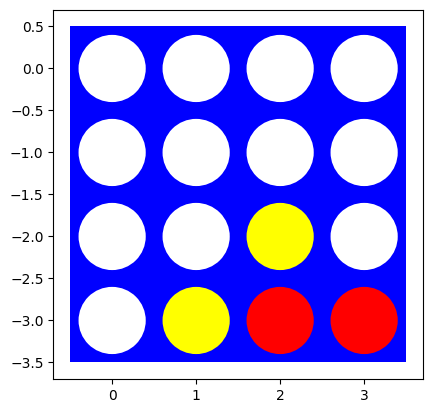

Time taken for Heuristic Minimax Agent to make a move: 0.396477 seconds
Chosen action: 1

Measuring heuristic move time for board size (5, 5):


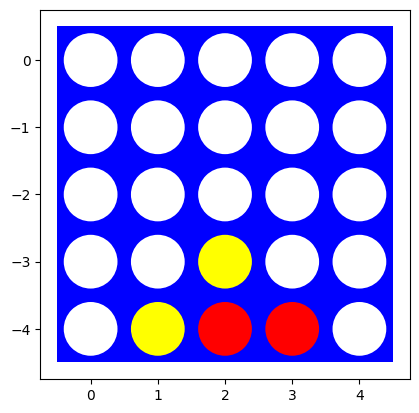

Time taken for Heuristic Minimax Agent to make a move: 2.497095 seconds
Chosen action: 4

Measuring heuristic move time for board size (6, 7):


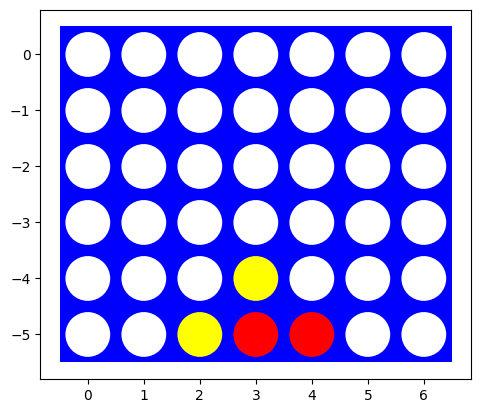

Time taken for Heuristic Minimax Agent to make a move: 14.674539 seconds
Chosen action: 5


In [20]:
import time

# Test move time on different board sizes for the Heuristic Minimax agent

# Assuming MinimaxAgent class (with heuristic and depth limit) and necessary helper functions are defined

def measure_heuristic_move_time(agent, board_shape=(6, 7)):
    board = empty_board(board_shape)
    # Create a consistent initial state for testing
    rows, cols = board_shape
    if rows > 2:
        board[rows - 1, cols // 2] = 1
        if cols > 1:
            board[rows - 1, cols // 2 - 1] = -1
        if cols > cols // 2:
             board[rows - 1, cols // 2 + 1] = 1
        if rows > 3 and cols > cols // 2 - 1:
             board[rows - 2, cols // 2] = -1


    print(f"\nMeasuring heuristic move time for board size {board_shape}:")
    visualize(board) # Optional: visualize the test board

    start_time = time.time()
    # Assuming it's player 1's turn
    action = agent(board, 1)
    end_time = time.time()
    time_taken = end_time - start_time
    print(f"Time taken for Heuristic Minimax Agent to make a move: {time_taken:.6f} seconds")
    print(f"Chosen action: {action}")


# Create a Heuristic Minimax agent (default depth limit is set in __call__)
heuristic_minimax_agent_p1 = MinimaxAgent(player=1)

# Test on a smaller board (e.g., 4x4)
measure_heuristic_move_time(heuristic_minimax_agent_p1, board_shape=(4, 4))

# Test on a slightly larger board (e.g., 5x5)
measure_heuristic_move_time(heuristic_minimax_agent_p1, board_shape=(5, 5))

# Test on a standard board (6x7)
measure_heuristic_move_time(heuristic_minimax_agent_p1, board_shape=(6, 7))

# Note: You can experiment with different depth limits within the MinimaxAgent class definition
# or by passing a depth_limit argument to the agent call if you modify the __call__ method.

### Playtime [5 points]

Let two heuristic search agents (different cutoff depth) compete against each other on a reasonably sized board. Since there is no randomness, you only need to let them play once.

In [21]:
# Let two heuristic search agents compete against each other

# Assuming MinimaxAgent class (with heuristic and depth limit in __call__)
# and play_game function are defined

# Create two heuristic minimax agents with different depth limits
# You might need to adjust the __call__ method or agent initialization
# to easily set different depth limits for different instances.
# For this example, let's assume we can pass depth during creation or modify the class slightly.

class HeuristicMinimaxAgent(MinimaxAgent):
    """
    Heuristic Minimax agent with a configurable depth limit.
    """
    def __init__(self, player, depth_limit):
        super().__init__(player)
        self.depth_limit = depth_limit

    # Override the __call__ method to use the instance's depth_limit
    def __call__(self, board, player_to_move):
        if player_to_move == self.player:
            return self.find_best_action(board, depth_limit=self.depth_limit)
        else:
            return None


# Create two agents with different depth limits
# Experiment with these depth values
agent_low_depth = HeuristicMinimaxAgent(player=1, depth_limit=2) # Example: depth 2
agent_high_depth = HeuristicMinimaxAgent(player=-1, depth_limit=4) # Example: depth 4

# Choose a reasonably sized board
board_shape_to_test = (6, 7) # Standard board size

print(f"Simulating a game between Heuristic Agent (Depth {agent_low_depth.depth_limit}, Player 1) and Heuristic Agent (Depth {agent_high_depth.depth_limit}, Player -1) on a {board_shape_to_test[0]}x{board_shape_to_test[1]} board:")

# Play the game
# The play_game function assumes agent1 is player 1 and agent2 is player -1
winner = play_game(agent_low_depth, agent_high_depth, board_shape=board_shape_to_test, visualize_game=False) # Set visualize_game to True to see the game progress

print("\nGame Over.")
if winner == 1:
    print(f"Winner: Heuristic Agent (Player 1, Depth {agent_low_depth.depth_limit})")
elif winner == -1:
    print(f"Winner: Heuristic Agent (Player -1, Depth {agent_high_depth.depth_limit})")
else:
    print("Result: Draw")

# Analyze the result in the markdown cell below

Simulating a game between Heuristic Agent (Depth 2, Player 1) and Heuristic Agent (Depth 4, Player -1) on a 6x7 board:

Game Over.
Winner: Heuristic Agent (Player 1, Depth 2)


## Challenge task [up to +10 bonus point will be awarded separately]

Find another student and let your best agent play against the other student's best player. We will set up a class tournament on Canvas. This tournament will continue after the submission deadline.

## Graduate student advanced task: Pure Monte Carlo Search and Best First Move [10 point]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 bonus point].

### Pure Monte Carlo Search

Implement Pure Monte Carlo Search and investigate how this search performs on the test boards that you have used above.

In [ ]:
# Your code/ answer goes here.

### Best First Move

Use your Monte Carlo Search to determine what the best first move for red is? Describe under what assumptions this is the "best" first move.  

In [ ]:
# Your code/ answer goes here.

# Task
Implement a Minimax agent with alpha-beta pruning for Connect 4, experiment with it on manually created boards and against a random agent on a smaller board, analyze its performance and the impact of move ordering, and discuss strategies for handling the initial moves.

## Implement minimax search with alpha-beta pruning

### Subtask:
Implement the core minimax algorithm with alpha-beta pruning for the Connect 4 game. This will involve creating a function that takes the current board state, player, and optionally a depth limit and alpha/beta values.


**Reasoning**:
Implement the MinimaxAgent class with the minimax function including alpha-beta pruning, following the instructions for defining the class and the minimax function with its parameters, base cases, recursive calls, and pruning logic.

